# R script for visualizing gene set analysis output

Run the following command 

`geneScore -i /home/xw2629/xuebing/RPL3L/code/deseq2-D308_vs_infant.tsv -skip 1 -cScore 3 -d /home/xw2629/genomes/geneSets/msigdb_v2024.1.Hs_GMTs/msigdb.v2024.1.Hs.symbols.gmt -o msigdb-deseq2-D308-vs-infant-ks-20250727 -p 1e-8 -plot`
 




                                                                        gene.set
1                                                   HAMAI_APOPTOSIS_VIA_TRAIL_UP
2                               LIU_OVARIAN_CANCER_TUMORS_AND_XENOGRAFTS_XDGS_DN
3                                           DESCARTES_FETAL_CEREBELLUM_MICROGLIA
4                                                 MILI_PSEUDOPODIA_HAPTOTAXIS_UP
5                                                                        MIR3662
6 ERWIN_COHEN_BLOOD_LIVE_VACCINE_TC_83_AGE_23_48YO_VACCINATED_VS_CONTROL_14DY_UP
                                                                                                                           description
1                                                   https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/HAMAI_APOPTOSIS_VIA_TRAIL_UP
2                               https://www.gsea-msigdb.org/gsea/msigdb/human/geneset/LIU_OVARIAN_CANCER_TUMORS_AND_XENOGRAFTS_XDGS_DN
3                           

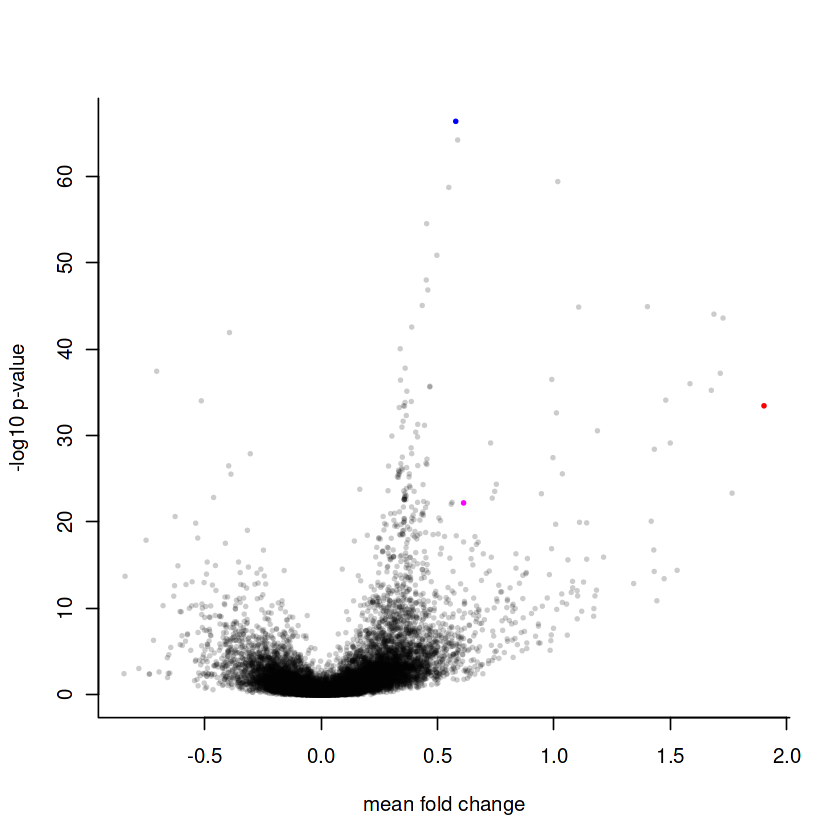

In [1]:
# plot gene set analysis
x=read.table("/home/xw2629/xuebing/RPL3L/code/msigdb-deseq2-D308-vs-infant-ks-20250727/geneset_summary.txt",header=T)
print(head(x))

filter = x$count.f >=50 & x$count.b >=50
print(sum(filter))
x = x[filter,]

plot(x$mean_f_minus_b,-log10(x$ks.p.value),pch=16,cex=0.5,col=rgb(0,0,0,0.2),bty='l',xlab='mean fold change', ylab='-log10 p-value')
heart_myeloid = grep("DESCARTES_FETAL_HEART_MYELOID_CELLS",x$gene.set)
apoptosis = grep("HAMAI_APOPTOSIS_VIA_TRAIL_UP",x$gene.set)
heart_failure = grep("THUM_SYSTOLIC_HEART_FAILURE_UP",x$gene.set)
points(x$mean_f_minus_b[heart_myeloid],-log10(x$ks.p.value[heart_myeloid]),col='red',pch=16,cex=0.5)
points(x$mean_f_minus_b[apoptosis],-log10(x$ks.p.value[apoptosis]),col='blue',pch=16,cex=0.5)
points(x$mean_f_minus_b[heart_failure],-log10(x$ks.p.value[heart_failure]),col='magenta',pch=16,cex=0.5)

